# ARZ GYM

In this tutorial, we show how ARZ traffic simulator is working on the Gym environment.


In [1]:
import numpy as np
import logz
import gym
import gym_arz
from settings_file import *

env = gym.make("arz-v0", sett=settings, cont_sett = control_settings)

print("Action space is discrete?:", env.discrete)
print("Size of actions: {}".format(env.action_space))



Action space is discrete?: False
Size of actions: Box(1,)


/Users/shpark/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
# Simulation Setting
T = settings['T']
dt = settings['dt']
N = len(np.arange(0,T+dt,dt))

r_size = len(env.r)
y_size = len(env.y)
v_size = len(env.v)

r_save = np.zeros([r_size,N])
y_save = np.zeros([y_size,N])
v_save = np.zeros([v_size,N])
reward_save = np.zeros(N)

env.reset()
r_save[:,0] = env.r.reshape(r_size,)
y_save[:,0] = env.y.reshape(y_size,)
v_save[:,0] = env.v.reshape(v_size,)

# Input
rs = 0.12
vs = 10
qs = rs * vs # app

# Simulation
for i in range(N-1):
    #action = find_nearest(env_qs_input,qs)
    if env.discrete:
        action = find_nearest(env_qs_input,qs)
    else:
        action = qs
    states, reward, is_done, info = env.step(action)
    r_save[:,i+1] = env.r.reshape(r_size,)
    y_save[:,i+1] = env.y.reshape(y_size,)
    v_save[:,i+1] = env.v.reshape(v_size,)
    reward_save[i+1] = reward

Time over..


# Visualization

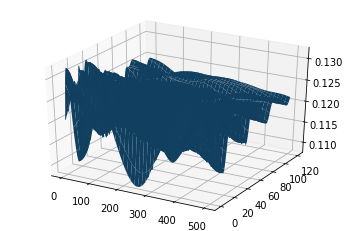

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## create meshgrid
L = env.L  #[m]
dx = env.dx
x = np.arange(0,L+dx,dx)
t = np.arange(0,T+dt,dt)

xx, tt = np.meshgrid(x,t,indexing='ij')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(xx,tt,r_save)

In [5]:
N

1201